# <center> PPOL564 | Data Science 1: Foundations </center>
### <center> Final Project </center>
### <center> Transnational Analysis of factors that influence Food Insecurity </center> <br>



#### By      : Sonali Subbu Rathinam 
#### NetID : ss4608
#### Date   : December 16th, 2021

In [1]:
#Importing the required modules 

import pandas as pd
import numpy as np

#For Web-scraping 
import requests
from bs4 import BeautifulSoup
import wbdata #Importing world bank data

#For standardizing country names
import country_converter as cc

#For Imputing missing data
from sklearn.impute import KNNImputer


# Plotting libraries
from plotnine import *
import matplotlib.pyplot as plt

# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.

# Machine learning methods 
from sklearn.linear_model import LinearRegression as LM
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor as DR
from sklearn.ensemble import RandomForestRegressor as RR

# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline

# For model interpretation
from sklearn.inspection import (
    permutation_importance,
    partial_dependence, 
    PartialDependenceDisplay, 
    plot_partial_dependence
)

# Misc
import warnings
warnings.filterwarnings("ignore")

In [2]:
#To display the entire dataframe
#pd.set_option("display.max_rows", None, "display.max_columns", None)

#To be able to make modifications on subsets of dataframes
pd.options.mode.chained_assignment = None

#### Scraping the Target Variable - Global Food Insecurity Index

In [3]:
#This is the link of our target variable - Global Food Insecurity Index
url_target = "https://impact.economist.com/sustainability/project/food-security-index/Index/YoY"

In [4]:
# Downloading the web page
page_target = requests.get(url_target) 
page_target.status_code #Checking status - we got 200, so its good

200

In [5]:
soup_target = BeautifulSoup(page_target.content, 'html.parser') # Parsing
target_content = [i.get_text() for i in soup_target.find_all('table')] #Obtaining the table

In [6]:
print(target_content) #Checking what we got

["\n\n\nGlobal ranking\nCountry\n2012\n2013\n2014\n2015\n2016\n2017\n2018\n2019\n2020\n2021\n\nLast 10 Year change\n\n\n\n\n54th\nAlgeria\n\n53.2\n51.3\n57.4\n58.2\n62.9\n63.5\n63.3\n63.7\n61.6\n63.9\n\n\n\n98th\nAngola\n\n40.1\n40.9\n38.5\n40.2\n38.4\n38.1\n39.1\n40.6\n41.7\n41.1\n\n\n\n53rd\nArgentina\n\n61.0\n61.2\n61.5\n59.1\n64.2\n65.6\n66.9\n63.1\n63.1\n64.2\n\n\n\n=32nd\nAustralia\n\n70.9\n74.4\n76.5\n75.9\n77.1\n76.1\n78.1\n75.9\n73.9\n71.6\n\n\n\n2nd\nAustria\n\n79.6\n79.0\n79.0\n79.9\n79.6\n79.2\n78.7\n79.2\n80.1\n81.3\n\n\n\n56th\nAzerbaijan\n\n57.5\n61.2\n62.8\n64.5\n61.6\n58.9\n58.8\n61.9\n61.5\n62.6\n\n\n\n43rd\nBahrain\n\n63.2\n64.9\n67.1\n65.4\n65.8\n67.1\n67.8\n68.2\n68.4\n68.5\n\n\n\n84th\nBangladesh\n\n44.4\n47.7\n49.1\n50.2\n51.0\n53.4\n53.0\n50.8\n50.5\n49.1\n\n\n\n=36th\nBelarus\n\n64.0\n64.6\n67.5\n64.0\n67.9\n66.3\n71.5\n73.5\n70.4\n70.9\n\n\n\n19th\nBelgium\n\n76.1\n76.4\n77.1\n77.9\n77.5\n78.3\n78.1\n76.9\n76.9\n76.1\n\n\n\n93rd\nBenin\n\n39.9\n40.3\n41.8\n45.

In [7]:
#Output is one long string inside a list, so we are going to split it using a for loop
for i in target_content:
    temp1 = i.split("\n") #separating by the new line character
       

In [8]:
#Checking if we got desired result
print(temp1)

['', '', '', 'Global ranking', 'Country', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '', 'Last 10 Year change', '', '', '', '', '54th', 'Algeria', '', '53.2', '51.3', '57.4', '58.2', '62.9', '63.5', '63.3', '63.7', '61.6', '63.9', '', '', '', '98th', 'Angola', '', '40.1', '40.9', '38.5', '40.2', '38.4', '38.1', '39.1', '40.6', '41.7', '41.1', '', '', '', '53rd', 'Argentina', '', '61.0', '61.2', '61.5', '59.1', '64.2', '65.6', '66.9', '63.1', '63.1', '64.2', '', '', '', '=32nd', 'Australia', '', '70.9', '74.4', '76.5', '75.9', '77.1', '76.1', '78.1', '75.9', '73.9', '71.6', '', '', '', '2nd', 'Austria', '', '79.6', '79.0', '79.0', '79.9', '79.6', '79.2', '78.7', '79.2', '80.1', '81.3', '', '', '', '56th', 'Azerbaijan', '', '57.5', '61.2', '62.8', '64.5', '61.6', '58.9', '58.8', '61.9', '61.5', '62.6', '', '', '', '43rd', 'Bahrain', '', '63.2', '64.9', '67.1', '65.4', '65.8', '67.1', '67.8', '68.2', '68.4', '68.5', '', '', '', '84th', 'Bangladesh', ''

In [9]:
#We have split the contents of the string, now we are going to remove unnecessary content

temp_list1 =[] #Empty list that will later store the content 

for i in temp1: #For loop to iterate through our list
    if(i!=''):   #To remove spaces 
        if(i!="Last 10 Year change"):  #To remove this string
            temp_list1.append(i)       #Only appending the required content


In [10]:
#Now checking the result again
print(temp_list1)

['Global ranking', 'Country', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '54th', 'Algeria', '53.2', '51.3', '57.4', '58.2', '62.9', '63.5', '63.3', '63.7', '61.6', '63.9', '98th', 'Angola', '40.1', '40.9', '38.5', '40.2', '38.4', '38.1', '39.1', '40.6', '41.7', '41.1', '53rd', 'Argentina', '61.0', '61.2', '61.5', '59.1', '64.2', '65.6', '66.9', '63.1', '63.1', '64.2', '=32nd', 'Australia', '70.9', '74.4', '76.5', '75.9', '77.1', '76.1', '78.1', '75.9', '73.9', '71.6', '2nd', 'Austria', '79.6', '79.0', '79.0', '79.9', '79.6', '79.2', '78.7', '79.2', '80.1', '81.3', '56th', 'Azerbaijan', '57.5', '61.2', '62.8', '64.5', '61.6', '58.9', '58.8', '61.9', '61.5', '62.6', '43rd', 'Bahrain', '63.2', '64.9', '67.1', '65.4', '65.8', '67.1', '67.8', '68.2', '68.4', '68.5', '84th', 'Bangladesh', '44.4', '47.7', '49.1', '50.2', '51.0', '53.4', '53.0', '50.8', '50.5', '49.1', '=36th', 'Belarus', '64.0', '64.6', '67.5', '64.0', '67.9', '66.3', '71.5', '73.5', '70.4

In [11]:
#Now we have all the required content, so we are going to  store each country's data in a list to obtain a list of lists

count1 = 0                         #To keep track 
temp_list2 =[]                     #An empty list to use in the loop, which will hold each country's data
final_list =[]                     #This will be the final list of lists


for i in temp_list1:               #Loop to iterate through the content
    temp_list2.append(i)           #Appending the content to the empty list created above
    count1 = count1 +1             #Incrementing the count variable
    
    if (count1%12==0):             #We get information about the next country after 12 observations
        final_list.append(temp_list2)   #So each country's information stored in a list is append to the final list to obtain list of lists
        temp_list2=[]             #Clearing the contents of temp list after append statement

In [12]:
#Checking the result
print(final_list)

[['Global ranking', 'Country', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'], ['54th', 'Algeria', '53.2', '51.3', '57.4', '58.2', '62.9', '63.5', '63.3', '63.7', '61.6', '63.9'], ['98th', 'Angola', '40.1', '40.9', '38.5', '40.2', '38.4', '38.1', '39.1', '40.6', '41.7', '41.1'], ['53rd', 'Argentina', '61.0', '61.2', '61.5', '59.1', '64.2', '65.6', '66.9', '63.1', '63.1', '64.2'], ['=32nd', 'Australia', '70.9', '74.4', '76.5', '75.9', '77.1', '76.1', '78.1', '75.9', '73.9', '71.6'], ['2nd', 'Austria', '79.6', '79.0', '79.0', '79.9', '79.6', '79.2', '78.7', '79.2', '80.1', '81.3'], ['56th', 'Azerbaijan', '57.5', '61.2', '62.8', '64.5', '61.6', '58.9', '58.8', '61.9', '61.5', '62.6'], ['43rd', 'Bahrain', '63.2', '64.9', '67.1', '65.4', '65.8', '67.1', '67.8', '68.2', '68.4', '68.5'], ['84th', 'Bangladesh', '44.4', '47.7', '49.1', '50.2', '51.0', '53.4', '53.0', '50.8', '50.5', '49.1'], ['=36th', 'Belarus', '64.0', '64.6', '67.5', '64.0', '67.9', '66.3', '7

In [13]:
#We have now got a list of lists as desired, now we will convert this to a dataframe
food_insecurity = pd.DataFrame(final_list)

#Checking the dataframe
display(food_insecurity)

,0,1,2,3,4,5,6,7,8,9,10,11
0,Global ranking,Country,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,54th,Algeria,53.2,51.3,57.4,58.2,62.9,63.5,63.3,63.7,61.6,63.9
2,98th,Angola,40.1,40.9,38.5,40.2,38.4,38.1,39.1,40.6,41.7,41.1
3,53rd,Argentina,61.0,61.2,61.5,59.1,64.2,65.6,66.9,63.1,63.1,64.2
4,=32nd,Australia,70.9,74.4,76.5,75.9,77.1,76.1,78.1,75.9,73.9,71.6
...,...,...,...,...,...,...,...,...,...,...,...,...
109,78th,Uzbekistan,53.3,54.7,53.1,55.5,58.6,60.2,55.0,54.5,54.1,53.8
110,102nd,Venezuela,49.3,49.1,48.3,47.8,49.8,46.2,45.8,41.7,40.5,39.4
111,61st,Vietnam,53.9,58.9,62.1,62.2,63.0,59.6,62.9,62.3,62.7,61.1
112,112th,Yemen,35.7,35.2,34.9,40.2,36.4,36.0,34.7,35.2,35.2,35.7


In [14]:
#We have now got a dataframe, now we will make the first row as the header of the dataframe 

new_header = food_insecurity.iloc[0] #grab the first row for the header
food_insecurity = food_insecurity[1:] #take the data less the header row
food_insecurity.columns = new_header #set the header row as the df header

In [15]:
#Checking the dataframe
display(food_insecurity)

,Global ranking,Country,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,54th,Algeria,53.2,51.3,57.4,58.2,62.9,63.5,63.3,63.7,61.6,63.9
2,98th,Angola,40.1,40.9,38.5,40.2,38.4,38.1,39.1,40.6,41.7,41.1
3,53rd,Argentina,61.0,61.2,61.5,59.1,64.2,65.6,66.9,63.1,63.1,64.2
4,=32nd,Australia,70.9,74.4,76.5,75.9,77.1,76.1,78.1,75.9,73.9,71.6
5,2nd,Austria,79.6,79.0,79.0,79.9,79.6,79.2,78.7,79.2,80.1,81.3
...,...,...,...,...,...,...,...,...,...,...,...,...
109,78th,Uzbekistan,53.3,54.7,53.1,55.5,58.6,60.2,55.0,54.5,54.1,53.8
110,102nd,Venezuela,49.3,49.1,48.3,47.8,49.8,46.2,45.8,41.7,40.5,39.4
111,61st,Vietnam,53.9,58.9,62.1,62.2,63.0,59.6,62.9,62.3,62.7,61.1
112,112th,Yemen,35.7,35.2,34.9,40.2,36.4,36.0,34.7,35.2,35.2,35.7


In [16]:
#Dropping the Global Ranking column
food_insecurity = food_insecurity.drop(['Global ranking'], axis=1)


In [17]:
#Converting this dataframe from wide to long format
food_insecurity = pd.melt(food_insecurity,id_vars=['Country'])

#Renaming column names
food_insecurity = food_insecurity.rename(columns={0: 'Year', "value" : "GFSI_Index"})  


In [18]:
#Check the dataframe after changes
food_insecurity.head()

,Country,Year,GFSI_Index
0,Algeria,2012,53.2
1,Angola,2012,40.1
2,Argentina,2012,61.0
3,Australia,2012,70.9
4,Austria,2012,79.6


In [19]:
#Need to ensure all the countries merge properly later, so we are going to create a function for converting to standard type

def func_cnames(df=None):
    """
    func_cnames takes in a dataframe, converts it into a list, changes the country names to short type, and then is converted
    back to a dataframe
    -------------------------------------------------------------------------------------------------------------------------
    Arguments:
    df -> Dataframe; its default value is None
    -------------------------------------------------------------------------------------------------------------------------
    Return:
    A dataframe
    """
    
    #Converting it to a list to perform some tasks
    list1 = df.values.tolist()
    
    #Converting the country name to name_short 
    for i in range(1, df.shape[0]):
        list1[i][0] = cc.convert(names=list1[i][0], to='name_short')
    
    df1 = pd.DataFrame(list1)
    return(df1)

In [20]:
#Calling function to standardize country-names
fi_final = func_cnames(food_insecurity)

In [21]:
#check the result
display(fi_final)

#Renaming column names
fi_final = fi_final.rename(columns={0: 'Country', 1 : "Year", 2 : "GFSI_Index"})  

,0,1,2
0,Algeria,2012,53.2
1,Angola,2012,40.1
2,Argentina,2012,61.0
3,Australia,2012,70.9
4,Austria,2012,79.6
...,...,...,...
1125,Uzbekistan,2021,53.8
1126,Venezuela,2021,39.4
1127,Vietnam,2021,61.1
1128,Yemen,2021,35.7


In [22]:
#Check data types 
fi_final.dtypes

Country       object
Year          object
GFSI_Index    object
dtype: object

In [23]:
#Change year to int type, this is done so that we can merge dataframes easily later
fi_final["Year"] = fi_final["Year"].astype(str).astype(int)

This is the target variable dataframe <br> <br> 
#### Let us now scrape each predictor variable

##### Obtaining World Bank Data

In [24]:
#Checking the topics in world bank data
wbdata.get_topic()

  id  value
----  -------------------------------
   1  Agriculture & Rural Development
   2  Aid Effectiveness
   3  Economy & Growth
   4  Education
   5  Energy & Mining
   6  Environment
   7  Financial Sector
   8  Health
   9  Infrastructure
  10  Social Protection & Labor
  11  Poverty
  12  Private Sector
  13  Public Sector
  14  Science & Technology
  15  Social Development
  16  Urban Development
  17  Gender
  18  Millenium development goals
  19  Climate Change
  20  External Debt
  21  Trade

In [25]:
#Viewing indicators that are required
wbdata.get_indicator(topic=11)

id                     name
---------------------  -----------------------------------------------------------------------------------------------------------------
1.0.HCount.1.90usd     Poverty Headcount ($1.90 a day)
1.0.HCount.2.5usd      Poverty Headcount ($2.50 a day)
1.0.HCount.Mid10to50   Middle Class ($10-50 a day) Headcount
1.0.HCount.Ofcl        Official Moderate Poverty Rate-National
1.0.HCount.Poor4uds    Poverty Headcount ($4 a day)
1.0.HCount.Vul4to10    Vulnerable ($4-10 a day) Headcount
1.0.PGap.1.90usd       Poverty Gap ($1.90 a day)
1.0.PGap.2.5usd        Poverty Gap ($2.50 a day)
1.0.PGap.Poor4uds      Poverty Gap ($4 a day)
1.0.PSev.1.90usd       Poverty Severity ($1.90 a day)
1.0.PSev.2.5usd        Poverty Severity ($2.50 a day)
1.0.PSev.Poor4uds      Poverty Severity ($4 a day)
1.1.HCount.1.90usd     Poverty Headcount ($1.90 a day)-Rural
1.1.HCount.2.5usd      Poverty Headcount ($2.50 a day)-Rural
1.1.HCount.Mid10to50   Middle Class ($10-50 a day) Headcount-Rural

In [26]:
#Creating a dictionary of the required indicators
indicators = {
    "AG.LND.ARBL.HA.PC" : "Arable Land in Hectares per person",
    "AG.YLD.CREL.KG" :"Cereal yield (kg/hectare)",
    "SL.EMP.WORK.ZS" : "Wage and Salaried Employees"
}

In [27]:
#Storing all the data in a dataframe
df_WB=wbdata.get_dataframe(indicators,country="all")
#Checking the dataframe
display(df_WB)

Arable Land in Hectares per person  \
country                     date                                       
Africa Eastern and Southern 2020                                 NaN   
                            2019                                 NaN   
                            2018                            0.184952   
                            2017                            0.189571   
                            2016                            0.195264   
...                                                              ...   
Zimbabwe                    1964                            0.470754   
                            1963                            0.475025   
                            1962                            0.479054   
                            1961                            0.482710   
                            1960                                 NaN   

                                  Cereal yield (kg/hectare)  \
country                     date                              
Africa Eastern and Southern 2020                        NaN   
                            2019                        NaN   
                            2018                1622.882922   
                            2017                1728.818670   
                            2016                1498.714700   
...                                                     ...   
Zimbabwe                    1964                 820.500000   
                            1963                 822.500000   
                            1962                 905.900000   
                            1961                 919.700000   
                            1960                        NaN   

                                  Wage and Salaried Employees  
country                     date                               
Africa Eastern and Southern 2020                          NaN  
                            2019                    27.844263  
                            2018                    27.755236  
                            2017                    27.416973  
                            2016                    27.138512  
...                                                       ...  
Zimbabwe                    1964                          NaN  
                            1963                          NaN  
                            1962                          NaN  
                            1961                          NaN  
                            1960                          NaN  

[16226 rows x 3 columns]

In [28]:
#creates a copy of dataframe
df_wb=df_WB.copy() 
#Resetting the index
df_wb.reset_index(inplace=True)

In [29]:
#To check result
df_wb.sample(10)

,country,date,Arable Land in Hectares per person,Cereal yield (kg/hectare),Wage and Salaried Employees
10079,Luxembourg,2006,0.126947,5596.800000,92.150002
9330,"Korea, Dem. People's Rep.",1962,0.181103,2594.100000,NaN
15077,Turkey,2010,0.295657,2727.100000,60.900002
14175,St. Martin (French part),1997,NaN,NaN,NaN
6701,Equatorial Guinea,1968,0.417479,NaN,NaN
12038,Oman,1999,0.013748,5181.500000,87.889999
8379,Iceland,1998,0.474371,NaN,80.839996
5723,"Congo, Dem. Rep.",1970,0.321822,727.100000,NaN
474,East Asia & Pacific (excluding high income),1973,0.130612,2172.307697,NaN
8590,"Iran, Islamic Rep.",1970,0.531320,884.700000,NaN


In [30]:
#change column name
df_wb = df_wb.rename(columns={'date': 'Year'})
df_wb.head()

,country,Year,Arable Land in Hectares per person,Cereal yield (kg/hectare),Wage and Salaried Employees
0,Africa Eastern and Southern,2020,NaN,NaN,NaN
1,Africa Eastern and Southern,2019,NaN,NaN,27.844263
2,Africa Eastern and Southern,2018,0.184952,1622.882922,27.755236
3,Africa Eastern and Southern,2017,0.189571,1728.818670,27.416973
4,Africa Eastern and Southern,2016,0.195264,1498.714700,27.138512


In [31]:
#Checking the number of observations for each year
df_wb.groupby("Year").size()

Year
1960    266
1961    266
1962    266
1963    266
1964    266
       ... 
2016    266
2017    266
2018    266
2019    266
2020    266
Length: 61, dtype: int64

In [32]:
#Checking data types
df_wb.dtypes

country                                object
Year                                   object
Arable Land in Hectares per person    float64
Cereal yield (kg/hectare)             float64
Wage and Salaried Employees           float64
dtype: object

In [33]:
#Converting year to int type, so that it will be easy to merge later
df_wb["year"] = df_wb["Year"].astype(str).astype(int)

In [34]:
#Check result
display(df_wb)

,country,Year,Arable Land in Hectares per person,Cereal yield (kg/hectare),Wage and Salaried Employees,year
0,Africa Eastern and Southern,2020,NaN,NaN,NaN,2020
1,Africa Eastern and Southern,2019,NaN,NaN,27.844263,2019
2,Africa Eastern and Southern,2018,0.184952,1622.882922,27.755236,2018
3,Africa Eastern and Southern,2017,0.189571,1728.818670,27.416973,2017
4,Africa Eastern and Southern,2016,0.195264,1498.714700,27.138512,2016
...,...,...,...,...,...,...
16221,Zimbabwe,1964,0.470754,820.500000,NaN,1964
16222,Zimbabwe,1963,0.475025,822.500000,NaN,1963
16223,Zimbabwe,1962,0.479054,905.900000,NaN,1962
16224,Zimbabwe,1961,0.482710,919.700000,NaN,1961


In [35]:
#only including data from 2012
df_wb = df_wb[df_wb.year>2011]

In [36]:
#Dropping the column not required
df_wb = df_wb.drop(["Year"], axis=1)

In [37]:
#Function call to standardize country names, so that merging can be done properly
wb_final = func_cnames(df_wb)

In [38]:
#Renaming column names
wb_final = wb_final.rename(columns={0: 'Country', 1: "Arable_Land", 2 : "Cereal_Yield", 3 : "SalariedEmp",  4: "Year"})

In [39]:
#Check result
wb_final.head()

,Country,Arable_Land,Cereal_Yield,SalariedEmp,Year
0,Africa Eastern and Southern,NaN,NaN,NaN,2020
1,not found,NaN,NaN,27.844263,2019
2,not found,0.184952,1622.882922,27.755236,2018
3,not found,0.189571,1728.818670,27.416973,2017
4,not found,0.195264,1498.714700,27.138512,2016


In [40]:
#Check for missing data
wb_final.isna().sum()

Country           0
Arable_Land     614
Cereal_Yield    795
SalariedEmp     514
Year              0
dtype: int64

We have obtained the required world bank data. Now, we will merge this with our target dataframe, and see how many missing 
values we have after the merge.

In [41]:
#Merge with food insecurity dataframe
merge1 = fi_final.merge(wb_final,how="left",on=["Country", "Year"])

In [42]:
#Checking result
display(merge1)

,Country,Year,GFSI_Index,Arable_Land,Cereal_Yield,SalariedEmp
0,Algeria,2012,53.2,0.200795,1677.6,68.029999
1,Angola,2012,40.1,0.187192,552.0,27.889999
2,Argentina,2012,61.0,0.952573,4146.2,77.010002
3,Australia,2012,70.9,1.391666,2231.6,82.830002
4,Austria,2012,79.6,0.160748,6002.9,86.930000
...,...,...,...,...,...,...
1125,Uzbekistan,2021,53.8,NaN,NaN,NaN
1126,Venezuela,2021,39.4,NaN,NaN,NaN
1127,Vietnam,2021,61.1,NaN,NaN,NaN
1128,Yemen,2021,35.7,NaN,NaN,NaN


In [43]:
#Check for missing data
merge1.isna().sum()

Country           0
Year              0
GFSI_Index        0
Arable_Land     339
Cereal_Yield    353
SalariedEmp     226
dtype: int64

We obseve that the number of NA's has reduced, but they are still a lot in number

##### Obtaining Logistics Performance Indicator data

In [44]:
#Function for web-scraping the link for LPI

def func_lpi(url=None):
    """
    func_lpi will take in the url(as a string) as a parameter, parse using beautiful soup, and then use read_html to read 
    the required tables.
    ------------------------------------------------------------------------------------------------------------------------
    Arguments: 
    url -> The url to be scraped, it is a string; its default value is None
    ------------------------------------------------------------------------------------------------------------------------
    Return:
    A dataframe; which is basically the table scraped from the url
    """
    
    page_temp = requests.get(url)
    if(page_temp.status_code==200):#Checking if the web-page is obtained properly
        soup_temp = BeautifulSoup(page_temp.content, 'html.parser')
        t1 = soup_temp.findAll('table', {'class':"sticky-enabled"}) #This detail was found by inspecting the web-page
        df1 = pd.read_html(str(t1))
        df_l1 = pd.DataFrame(df1[0])
        return(df_l1)
    

In [45]:
#This are the urls for the LPI scores 

url_lpi2018 = "https://lpi.worldbank.org/international/global/2018.%202019"
url_lpi2016 = "https://lpi.worldbank.org/international/global/2016"
url_lpi2014 = "https://lpi.worldbank.org/international/global/2014"
url_lpi2012 = "https://lpi.worldbank.org/international/global/2012"

In [46]:
#We are going to call function for each url to obtain the final result

lpi2018 = func_lpi(url_lpi2018)
lpi2016 = func_lpi(url_lpi2016)
lpi2014 = func_lpi(url_lpi2014)
lpi2012 = func_lpi(url_lpi2012)


In [47]:
#Checking any one to see the results
display(lpi2016)

,Country,Year,LPI Rank,LPI Score,Customs,Customs.1,Infrastructure,Infrastructure.1,International shipments,International shipments.1,Logistics competence,Logistics competence.1,Tracking & tracing,Tracking & tracing.1,Timeliness,Timeliness.1
0,Germany,2016,1,4.23,2,4.12,1,4.44,8,3.86,1,4.28,3,4.27,2,4.45
1,Luxembourg,2016,2,4.22,9,3.90,4,4.24,1,4.24,10,4.01,8,4.12,1,4.80
2,Sweden,2016,3,4.20,8,3.92,3,4.27,4,4.00,2,4.25,1,4.38,3,4.45
3,Netherlands,2016,4,4.19,3,4.12,2,4.29,6,3.94,3,4.22,6,4.17,5,4.41
4,Singapore,2016,5,4.14,1,4.18,6,4.20,5,3.96,5,4.09,10,4.05,6,4.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Equatorial Guinea,2016,156,1.88,154,1.88,158,1.50,156,1.89,157,1.75,152,1.89,153,2.32
156,Mauritania,2016,157,1.87,131,2.14,157,1.54,154,2.00,158,1.74,159,1.54,157,2.14
157,Somalia,2016,158,1.75,159,1.29,156,1.57,157,1.86,156,1.85,160,1.51,152,2.35
158,Haiti,2016,159,1.72,158,1.70,159,1.47,159,1.81,159,1.68,158,1.56,160,2.02


We have now scraped the required LPI data

In [48]:
#Join two tables together
a = pd.concat([lpi2018,lpi2016],sort=False)
display(a)

,Country,Year,LPI Rank,LPI Score,Customs,Customs.1,Infrastructure,Infrastructure.1,International shipments,International shipments.1,Logistics competence,Logistics competence.1,Tracking & tracing,Tracking & tracing.1,Timeliness,Timeliness.1
0,Germany,2018,1,4.20,1,4.09,1,4.37,4,3.86,1,4.31,2,4.24,3,4.39
1,Sweden,2018,2,4.05,2,4.05,3,4.24,2,3.92,10,3.98,17,3.88,7,4.28
2,Belgium,2018,3,4.04,14,3.66,14,3.98,1,3.99,2,4.13,9,4.05,1,4.41
3,Austria,2018,4,4.03,12,3.71,5,4.18,3,3.88,6,4.08,7,4.09,12,4.25
4,Japan,2018,5,4.03,3,3.99,2,4.25,14,3.59,4,4.09,10,4.05,10,4.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Equatorial Guinea,2016,156,1.88,154,1.88,158,1.50,156,1.89,157,1.75,152,1.89,153,2.32
156,Mauritania,2016,157,1.87,131,2.14,157,1.54,154,2.00,158,1.74,159,1.54,157,2.14
157,Somalia,2016,158,1.75,159,1.29,156,1.57,157,1.86,156,1.85,160,1.51,152,2.35
158,Haiti,2016,159,1.72,158,1.70,159,1.47,159,1.81,159,1.68,158,1.56,160,2.02


In [49]:
#Join the other two tables together
b = pd.concat([lpi2014,lpi2012],sort=True)
display(b)

,Country,Customs,Customs.1,Infrastructure,Infrastructure.1,International shipments,International shipments.1,LPI Rank,LPI Score,Logistics competence,Logistics competence.1,Timeliness,Timeliness.1,Tracking & tracing,Tracking & tracing.1,Year
0,Germany,2,4.10,1,4.32,4,3.74,1,4.12,3,4.12,4,4.36,1,4.17,2014
1,Netherlands,4,3.96,3,4.23,11,3.64,2,4.05,2,4.13,6,4.34,6,4.07,2014
2,Belgium,11,3.80,8,4.10,2,3.80,3,4.04,4,4.11,2,4.39,4,4.11,2014
3,United Kingdom,5,3.94,6,4.16,12,3.63,4,4.01,5,4.03,7,4.33,5,4.08,2014
4,Singapore,3,4.01,2,4.28,6,3.70,5,4.00,8,3.97,9,4.25,11,3.90,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Nepal,125,2.20,149,1.87,151,1.86,151,2.04,146,2.12,153,2.21,149,1.95,2012
151,Chad,148,1.86,142,2.00,146,2.00,152,2.03,150,2.00,133,2.71,155,1.57,2012
152,Haiti,150,1.78,151,1.78,148,1.94,153,2.03,154,1.74,129,2.74,139,2.15,2012
153,Djibouti,154,1.72,154,1.51,154,1.77,154,1.80,153,1.84,154,2.19,153,1.73,2012


In [50]:
#Finally, join everything together
lpi_temp1 = pd.concat([a,b], ignore_index = True)
display(lpi_temp1)

,Country,Year,LPI Rank,LPI Score,Customs,Customs.1,Infrastructure,Infrastructure.1,International shipments,International shipments.1,Logistics competence,Logistics competence.1,Tracking & tracing,Tracking & tracing.1,Timeliness,Timeliness.1
0,Germany,2018,1,4.20,1,4.09,1,4.37,4,3.86,1,4.31,2,4.24,3,4.39
1,Sweden,2018,2,4.05,2,4.05,3,4.24,2,3.92,10,3.98,17,3.88,7,4.28
2,Belgium,2018,3,4.04,14,3.66,14,3.98,1,3.99,2,4.13,9,4.05,1,4.41
3,Austria,2018,4,4.03,12,3.71,5,4.18,3,3.88,6,4.08,7,4.09,12,4.25
4,Japan,2018,5,4.03,3,3.99,2,4.25,14,3.59,4,4.09,10,4.05,10,4.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,Nepal,2012,151,2.04,125,2.20,149,1.87,151,1.86,146,2.12,149,1.95,153,2.21
631,Chad,2012,152,2.03,148,1.86,142,2.00,146,2.00,150,2.00,155,1.57,133,2.71
632,Haiti,2012,153,2.03,150,1.78,151,1.78,148,1.94,154,1.74,139,2.15,129,2.74
633,Djibouti,2012,154,1.80,154,1.72,154,1.51,154,1.77,153,1.84,153,1.73,154,2.19


In [51]:
#Removing the rows that are not required 
lpi_temp1 = lpi_temp1.drop(lpi_temp1.iloc[:, [2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]], axis=1)
display(lpi_temp1)

,Country,Year,LPI Score
0,Germany,2018,4.20
1,Sweden,2018,4.05
2,Belgium,2018,4.04
3,Austria,2018,4.03
4,Japan,2018,4.03
...,...,...,...
630,Nepal,2012,2.04
631,Chad,2012,2.03
632,Haiti,2012,2.03
633,Djibouti,2012,1.80


In [52]:
#Since LPI scores are measured every two years, we are going to create rows for the odd years as well
#The effect of this has been changed later, to ensure that the unit of analysis is the same for all variables. 
lpi_repeated = pd.concat([lpi_temp1]*2, ignore_index=True)
display(lpi_repeated)

,Country,Year,LPI Score
0,Germany,2018,4.20
1,Sweden,2018,4.05
2,Belgium,2018,4.04
3,Austria,2018,4.03
4,Japan,2018,4.03
...,...,...,...
1265,Nepal,2012,2.04
1266,Chad,2012,2.03
1267,Haiti,2012,2.03
1268,Djibouti,2012,1.80


In [53]:
#Check data types
lpi_repeated.dtypes

Country       object
Year           int64
LPI Score    float64
dtype: object

In [54]:
#Creating subset of data
lpi_temp2 = lpi_repeated.loc[635:]
display(lpi_temp2)

,Country,Year,LPI Score
635,Germany,2018,4.20
636,Sweden,2018,4.05
637,Belgium,2018,4.04
638,Austria,2018,4.03
639,Japan,2018,4.03
...,...,...,...
1265,Nepal,2012,2.04
1266,Chad,2012,2.03
1267,Haiti,2012,2.03
1268,Djibouti,2012,1.80


In [55]:
#Decrementing year value by 1, so we get data for the other years also
lpi_temp2['Year'] = lpi_temp2['Year']-1
display(lpi_temp2)

,Country,Year,LPI Score
635,Germany,2017,4.20
636,Sweden,2017,4.05
637,Belgium,2017,4.04
638,Austria,2017,4.03
639,Japan,2017,4.03
...,...,...,...
1265,Nepal,2011,2.04
1266,Chad,2011,2.03
1267,Haiti,2011,2.03
1268,Djibouti,2011,1.80


In [56]:
#This subset is the first half of the data
lpi_new = lpi_repeated.drop(lpi_repeated.index[635:])
display(lpi_new)

,Country,Year,LPI Score
0,Germany,2018,4.20
1,Sweden,2018,4.05
2,Belgium,2018,4.04
3,Austria,2018,4.03
4,Japan,2018,4.03
...,...,...,...
630,Nepal,2012,2.04
631,Chad,2012,2.03
632,Haiti,2012,2.03
633,Djibouti,2012,1.80


In [57]:
#Now, we are combining both our subsets together
lpi_temp3 = pd.concat([lpi_new,lpi_temp2],sort=False)
display(lpi_temp3)

,Country,Year,LPI Score
0,Germany,2018,4.20
1,Sweden,2018,4.05
2,Belgium,2018,4.04
3,Austria,2018,4.03
4,Japan,2018,4.03
...,...,...,...
1265,Nepal,2011,2.04
1266,Chad,2011,2.03
1267,Haiti,2011,2.03
1268,Djibouti,2011,1.80


In [58]:
#Function call to standardize country names, so that merging can be done properly
lpi_final = func_cnames(lpi_temp3)

In [59]:
#Renaming column names
lpi_final = lpi_final.rename(columns={0: 'Country', 1: "Year", 2 : "LPI_Score"}) 

In [60]:
#Check result
display(lpi_final)

,Country,Year,LPI_Score
0,Germany,2018,4.20
1,Sweden,2018,4.05
2,Belgium,2018,4.04
3,Austria,2018,4.03
4,Japan,2018,4.03
...,...,...,...
1265,Nepal,2011,2.04
1266,Chad,2011,2.03
1267,Haiti,2011,2.03
1268,Djibouti,2011,1.80


In [61]:
#Checking data types
lpi_final.dtypes

Country       object
Year           int64
LPI_Score    float64
dtype: object

Merging the final LPI data with our previously merged dataframe

In [62]:
merge2 = merge1.merge(lpi_final,how="left",on=["Country", "Year"])


In [63]:
#Check the result
display(merge2)

,Country,Year,GFSI_Index,Arable_Land,Cereal_Yield,SalariedEmp,LPI_Score
0,Algeria,2012,53.2,0.200795,1677.6,68.029999,2.41
1,Angola,2012,40.1,0.187192,552.0,27.889999,2.28
2,Argentina,2012,61.0,0.952573,4146.2,77.010002,3.05
3,Australia,2012,70.9,1.391666,2231.6,82.830002,3.73
4,Austria,2012,79.6,0.160748,6002.9,86.930000,3.89
...,...,...,...,...,...,...,...
1125,Uzbekistan,2021,53.8,NaN,NaN,NaN,NaN
1126,Venezuela,2021,39.4,NaN,NaN,NaN,NaN
1127,Vietnam,2021,61.1,NaN,NaN,NaN,NaN
1128,Yemen,2021,35.7,NaN,NaN,NaN,NaN


In [64]:
#Check for missing data
merge2.isna().sum()

Country           0
Year              0
GFSI_Index        0
Arable_Land     339
Cereal_Yield    353
SalariedEmp     226
LPI_Score       372
dtype: int64

##### Obtaining data on Poverty

In [65]:
#Reading the csv file
poverty_new = pd.read_csv("share-of-population-in-extreme-poverty.csv")

In [66]:
#Check the results
display(poverty_new)

,Entity,Code,Year,$1.90 per day - share of population below poverty line
0,Albania,ALB,1981,0.464528
1,Albania,ALB,1982,0.407918
2,Albania,ALB,1983,0.464528
3,Albania,ALB,1984,0.534846
4,Albania,ALB,1985,0.534846
...,...,...,...,...
6948,Zimbabwe,ZWE,2015,28.671930
6949,Zimbabwe,ZWE,2016,32.366640
6950,Zimbabwe,ZWE,2017,33.862690
6951,Zimbabwe,ZWE,2018,33.216590


In [67]:
#Remove rows before 2012
poverty_new = poverty_new[poverty_new.Year>2011]

In [68]:
#Remove Code column 
poverty_new = poverty_new.drop(['Code'], axis=1)


In [69]:
#Change column names
poverty_new = poverty_new.rename(columns={'Entity': 'Country', "$1.90 per day - share of population below poverty line" : "Poverty Share"})  


In [70]:
#Changing data types so that appropriate edits can be made
poverty_new["Year"] = poverty_new["Year"].astype(str).astype(int)

In [71]:
#We are making these changes as some of these do not get standardized properly using country convertor
poverty_new = poverty_new[poverty_new["Country"]!="China (Rural)"]
poverty_new = poverty_new[poverty_new["Country"]!="China (Urban)"]
poverty_new = poverty_new[poverty_new["Country"]!="India (Rural)"]
poverty_new = poverty_new[poverty_new["Country"]!="India (Urban)"]
poverty_new = poverty_new[poverty_new["Country"]!="Indonesia (Rural)"]
poverty_new = poverty_new[poverty_new["Country"]!="Indonesia (Urban)"]


In [72]:
#Call the country convertor function 
pnew_final = func_cnames(poverty_new)

In [73]:
#Rename colummns
pnew_final = pnew_final.rename(columns={0: 'Country', 1: "Year", 2 : "Poverty_Share"}) 

In [74]:
#Changing data types so that appropriate edits can be made
pnew_final["Year"] = pnew_final["Year"].astype(str).astype(int)

In [75]:
#Merge with our previous dataframe
merge_pnew = merge2.merge(pnew_final,how="left",on=["Country", "Year"])


In [76]:
#Check result
display(merge_pnew)

,Country,Year,GFSI_Index,Arable_Land,Cereal_Yield,SalariedEmp,LPI_Score,Poverty_Share
0,Algeria,2012,53.2,0.200795,1677.6,68.029999,2.41,0.415515
1,Angola,2012,40.1,0.187192,552.0,27.889999,2.28,36.781340
2,Argentina,2012,61.0,0.952573,4146.2,77.010002,3.05,1.155554
3,Australia,2012,70.9,1.391666,2231.6,82.830002,3.73,0.423826
4,Austria,2012,79.6,0.160748,6002.9,86.930000,3.89,0.616917
...,...,...,...,...,...,...,...,...
1125,Uzbekistan,2021,53.8,NaN,NaN,NaN,NaN,NaN
1126,Venezuela,2021,39.4,NaN,NaN,NaN,NaN,NaN
1127,Vietnam,2021,61.1,NaN,NaN,NaN,NaN,NaN
1128,Yemen,2021,35.7,NaN,NaN,NaN,NaN,NaN


In [77]:
#Checking if there are any duplicates in the dataframe, there are none so that's good 
merge_pnew.duplicated().sum()

0

In [78]:
#Check missingness
merge_pnew.isna().sum()

Country            0
Year               0
GFSI_Index         0
Arable_Land      339
Cereal_Yield     353
SalariedEmp      226
LPI_Score        372
Poverty_Share    297
dtype: int64

##### Scraping the climate change performance index

In [79]:
#This the link for climate change index - this is one of the predictor variables of the model
url_ci="https://en.wikipedia.org/wiki/Climate_Change_Performance_Index"

In [80]:
page_ci = requests.get(url_ci)   #Download the web-page
page_ci.status_code              #Check status of download

200

In [81]:
soup_ci = BeautifulSoup(page_ci.content, 'html.parser')  #Parsing

#Obtaining tables
t3 = soup_ci.findAll('table', {'class':"wikitable"})
print(len(t3))

4


In [82]:
#The required table is the last one - so its index is 3 
temp3 = t3[3]

#Now, we are reading in the table, and converting it to dataframe
df_temp3 = pd.read_html(str(temp3))
df_ci = pd.DataFrame(df_temp3[0])
display(df_ci)

,Rank,Country,Score
0,1,-,-
1,2,-,-
2,3,-,-
3,4,Sweden,76
4,5,Morocco,70.48
5,6,Lithuania,70.47
6,7,Latvia,68.31
7,8,United Kingdom,65.92
8,9,Switzerland,65.42
9,10,Malta,65.06


In [83]:
#Removing Rank Column 
df_ci = df_ci.drop(['Rank'], axis=1)

#To remove the first three rows
df_ci = df_ci[df_ci.Country != "-"]


In [84]:
#Check result
df_ci.head()

,Country,Score
3,Sweden,76
4,Morocco,70.48
5,Lithuania,70.47
6,Latvia,68.31
7,United Kingdom,65.92


In [85]:
#Function call to standardize country names, so that merging can be done properly
ci_final = func_cnames(df_ci)

In [86]:
#Renaming column names
ci_final = ci_final.rename(columns={0: 'Country', 1: "CCPI"}) 

In [87]:
#To check result
ci_final.head()

,Country,CCPI
0,Sweden,76
1,Morocco,70.48
2,Lithuania,70.47
3,Latvia,68.31
4,United Kingdom,65.92


Merging this dataframe with our previously merged dataframe. The Climate Change Performance Index (CCPI) column will then be changed into 0/1, where 0 corresponds to 'No record of CCPI' and 1 corresponds to CCPI recorded. Countries that allow for report of CCPI index have higher probability of working towards climate change concerns, and this factor is included for our analysis of food insecurity.

In [88]:
#Merging the dataframes
merge4 = merge_pnew.merge(ci_final,how="left",on="Country")

In [89]:
#Check the result
display(merge4)

,Country,Year,GFSI_Index,Arable_Land,Cereal_Yield,SalariedEmp,LPI_Score,Poverty_Share,CCPI
0,Algeria,2012,53.2,0.200795,1677.6,68.029999,2.41,0.415515,42.10
1,Angola,2012,40.1,0.187192,552.0,27.889999,2.28,36.781340,NaN
2,Argentina,2012,61.0,0.952573,4146.2,77.010002,3.05,1.155554,49.01
3,Australia,2012,70.9,1.391666,2231.6,82.830002,3.73,0.423826,31.27
4,Austria,2012,79.6,0.160748,6002.9,86.930000,3.89,0.616917,48.78
...,...,...,...,...,...,...,...,...,...
1125,Uzbekistan,2021,53.8,NaN,NaN,NaN,NaN,NaN,NaN
1126,Venezuela,2021,39.4,NaN,NaN,NaN,NaN,NaN,NaN
1127,Vietnam,2021,61.1,NaN,NaN,NaN,NaN,NaN,NaN
1128,Yemen,2021,35.7,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
#Modify Column to 0 and 1
merge4['CCPI'] = merge4['CCPI'].apply(lambda x: 0 if  pd.isna(x) else 1)

#Check result
merge4.head()

,Country,Year,GFSI_Index,Arable_Land,Cereal_Yield,SalariedEmp,LPI_Score,Poverty_Share,CCPI
0,Algeria,2012,53.2,0.200795,1677.6,68.029999,2.41,0.415515,1
1,Angola,2012,40.1,0.187192,552.0,27.889999,2.28,36.781340,0
2,Argentina,2012,61.0,0.952573,4146.2,77.010002,3.05,1.155554,1
3,Australia,2012,70.9,1.391666,2231.6,82.830002,3.73,0.423826,1
4,Austria,2012,79.6,0.160748,6002.9,86.930000,3.89,0.616917,1


In [91]:
#Check missingness
merge4.isna().sum()

Country            0
Year               0
GFSI_Index         0
Arable_Land      339
Cereal_Yield     353
SalariedEmp      226
LPI_Score        372
Poverty_Share    297
CCPI               0
dtype: int64

In [92]:
#Check result
display(merge4)

,Country,Year,GFSI_Index,Arable_Land,Cereal_Yield,SalariedEmp,LPI_Score,Poverty_Share,CCPI
0,Algeria,2012,53.2,0.200795,1677.6,68.029999,2.41,0.415515,1
1,Angola,2012,40.1,0.187192,552.0,27.889999,2.28,36.781340,0
2,Argentina,2012,61.0,0.952573,4146.2,77.010002,3.05,1.155554,1
3,Australia,2012,70.9,1.391666,2231.6,82.830002,3.73,0.423826,1
4,Austria,2012,79.6,0.160748,6002.9,86.930000,3.89,0.616917,1
...,...,...,...,...,...,...,...,...,...
1125,Uzbekistan,2021,53.8,NaN,NaN,NaN,NaN,NaN,0
1126,Venezuela,2021,39.4,NaN,NaN,NaN,NaN,NaN,0
1127,Vietnam,2021,61.1,NaN,NaN,NaN,NaN,NaN,0
1128,Yemen,2021,35.7,NaN,NaN,NaN,NaN,NaN,0


In [93]:
#By analysing the data, we see that some predictor variables do not have data after 2018, so we will limit data till 2018 
merge4 = merge4[merge4.Year<2019]

In [94]:
#Check result
display(merge4)

,Country,Year,GFSI_Index,Arable_Land,Cereal_Yield,SalariedEmp,LPI_Score,Poverty_Share,CCPI
0,Algeria,2012,53.2,0.200795,1677.6,68.029999,2.41,0.415515,1
1,Angola,2012,40.1,0.187192,552.0,27.889999,2.28,36.781340,0
2,Argentina,2012,61.0,0.952573,4146.2,77.010002,3.05,1.155554,1
3,Australia,2012,70.9,1.391666,2231.6,82.830002,3.73,0.423826,1
4,Austria,2012,79.6,0.160748,6002.9,86.930000,3.89,0.616917,1
...,...,...,...,...,...,...,...,...,...
786,Uzbekistan,2018,55.0,0.123331,4055.9,64.809998,2.58,11.729680,0
787,Venezuela,2018,45.8,0.090006,3395.0,58.820000,2.23,NaN,0
788,Vietnam,2018,62.9,0.073141,5685.4,43.939999,3.27,1.801464,0
789,Yemen,2018,34.7,0.038518,759.2,45.299999,2.27,54.537280,0


In [95]:
#Check missingness
merge4.isna().sum()

Country           0
Year              0
GFSI_Index        0
Arable_Land       0
Cereal_Yield     14
SalariedEmp       0
LPI_Score        33
Poverty_Share    61
CCPI              0
dtype: int64

##### Net Food Trade

In [96]:
#Reading in the excel files
ft_2012 = pd.read_excel('WITS-Partner-2012.xlsx', sheet_name='Partner')
ft_2013 = pd.read_excel('WITS-Partner-2013.xlsx', sheet_name='Partner')
ft_2014 = pd.read_excel('WITS-Partner-2014.xlsx', sheet_name='Partner')
ft_2015 = pd.read_excel('WITS-Partner-2015.xlsx', sheet_name='Partner')
ft_2016 = pd.read_excel('WITS-Partner-2016.xlsx', sheet_name='Partner')
ft_2017 = pd.read_excel('WITS-Partner-2017.xlsx', sheet_name='Partner')
ft_2018 = pd.read_excel('WITS-Partner-2018.xlsx', sheet_name='Partner')


In [97]:
#To ensure that all floats are not in standard form
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [98]:
#Checking a random result
display(ft_2016)

,Reporter Name,Partner Name,Year,Trade Flow,Product Group,Export (US$ Thousand),Import (US$ Thousand),Export Product Share (%),Import Product Share (%),Revealed comparative advantage,...,MFN Total Tariff Lines,MFN Dutiable Tariff Lines Share (%),MFN Duty Free Tariff Lines Share (%),MFN Specific Tariff Lines Share (%),MFN AVE Tariff Lines Share (%),MFN MaxRate (%),MFN MinRate (%),MFN SpecificDuty Imports (US$ Thousand),MFN Dutiable Imports (US$ Thousand),MFN Duty Free Imports (US$ Thousand)
0,World,Aruba,2016,EXPIMP,Food Products,188496.310,5987.150,10.300,3.380,1.000,...,60469.000,50.060,10.170,218.800,1115.140,3000.000,0.000,15864.680,15990.970,0.000
1,World,Afghanistan,2016,EXPIMP,Food Products,760218.990,1914.660,8.220,0.180,1.000,...,36560.000,62.110,9.460,232.620,875.480,3000.000,0.000,1600.530,1944.650,0.000
2,World,Angola,2016,EXPIMP,Food Products,1070282.490,15574.570,6.930,0.060,1.000,...,57229.000,54.440,9.040,134.240,784.530,3000.000,0.000,1216.790,13481.420,0.000
3,World,Anguila,2016,EXPIMP,Food Products,8994.930,2754.240,12.480,21.750,NaN,...,14555.000,50.680,14.750,818.750,1427.230,3000.000,0.000,3876.620,5209.830,0.000
4,World,Albania,2016,EXPIMP,Food Products,575401.730,64813.290,7.740,3.170,1.000,...,70404.000,56.700,9.360,104.030,493.840,3000.000,0.000,40530.120,98835.910,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,World,Latin America & Caribbean,2016,EXPIMP,Food Products,34837788.520,71659809.740,3.460,7.610,NaN,...,106830.000,59.350,10.530,2.210,12.460,3000.000,0.000,52515963.740,86336180.960,0.000
240,World,Middle East & North Africa,2016,EXPIMP,Food Products,47919169.020,9846670.490,4.370,1.330,NaN,...,106995.000,59.380,10.540,3.330,18.800,3000.000,0.000,6464209.680,9658857.100,0.000
241,World,North America,2016,EXPIMP,Food Products,95784568.780,57632682.610,3.330,3.270,NaN,...,106829.000,59.350,10.530,5.710,32.200,3000.000,0.000,45852915.410,62071728.690,0.000
242,World,South Asia,2016,EXPIMP,Food Products,7445571.870,6660846.770,1.580,2.100,NaN,...,106251.000,59.250,10.510,7.240,40.790,3000.000,0.000,4744673.840,6570593.470,0.000


In [99]:
def func_ft(df=None):
    """
    The food trade related dataframes will be passed as arguments to func_ft, which will remove the unnecessary columns, 
    and call the func_cnames function to standardize country names so that merging can be performed easily.
    ------------------------------------------------------------------------------------------------------------------------
    Arguments : 
    df -> It is a dataframe, and default value is set to None
    ------------------------------------------------------------------------------------------------------------------------
    Return Value:
    The modified dataframe df_temp
    """
    #Taking only the required columns
    df = df[['Partner Name','Year', 'Export (US$ Thousand)', 'Import (US$ Thousand)']]
    
    #Removing this particular row as it does not get standardized properly using country convertor. 
    df = df[df['Partner Name'] != "United States Minor Outlying I"]

    #Calling the func_cnames function to standardize country names
    df_temp = func_cnames(df)
    
    #Change the column  names
    df_temp = df_temp.rename(columns={0: 'Country', 1 : 'Year', 2 : 'Export', 3: 'Import'}) 
    
    #Change Year type so that it is easier to merge later
    df_temp["Year"] = df_temp["Year"].astype(str).astype(int)
    
    #Create a new column -> Net Food Trade, as the difference between Export and Import
    df_temp['Net_Food_Trade'] = df_temp['Export'] - df_temp['Import']
    
    #Drop Export and Import columns 
    df_temp = df_temp.drop(['Export', 'Import'], axis=1)

    
    #Return the dataframe
    return(df_temp)



In [100]:
#Function calls

ft_2012_new = func_ft(ft_2012)
ft_2013_new = func_ft(ft_2013)
ft_2014_new = func_ft(ft_2014)
ft_2015_new = func_ft(ft_2015)
ft_2016_new = func_ft(ft_2016)
ft_2017_new = func_ft(ft_2017)
ft_2018_new = func_ft(ft_2018)

In [101]:
#Checking the types for one of the dataframes
ft_2018_new.dtypes

Country            object
Year                int32
Net_Food_Trade    float64
dtype: object

In [102]:
display(ft_2018_new)

,Country,Year,Net_Food_Trade
0,Aruba,2018,188596.210
1,Afghanistan,2018,1258157.070
2,Angola,2018,1053077.560
3,Anguilla,2018,3175.220
4,Albania,2018,626629.980
...,...,...,...
239,not found,2018,-30047116.330
240,not found,2018,40636740.670
241,not found,2018,51479830.800
242,not found,2018,492436.220


In [103]:
#We have to concat the dataframes together
ft_concat = pd.concat([ft_2012_new, ft_2013_new, ft_2014_new, ft_2015_new, ft_2016_new, ft_2017_new, ft_2018_new],sort=False)

display(ft_concat)

,Country,Year,Net_Food_Trade
0,Aruba,2012,241879.760
1,Afghanistan,2012,600792.680
2,Angola,2012,2549709.980
3,Anguilla,2012,3451.230
4,Albania,2012,553119.160
...,...,...,...
239,not found,2018,-30047116.330
240,not found,2018,40636740.670
241,not found,2018,51479830.800
242,not found,2018,492436.220


In [104]:
#Merging this with our previously merged dataframe
df_final = merge4.merge(ft_concat, how="left", on=["Country", "Year"])


In [105]:
#Check the result
display(df_final)

,Country,Year,GFSI_Index,Arable_Land,Cereal_Yield,SalariedEmp,LPI_Score,Poverty_Share,CCPI,Net_Food_Trade
0,Algeria,2012,53.2,0.201,1677.600,68.030,2.410,0.416,1,3415586.700
1,Angola,2012,40.1,0.187,552.000,27.890,2.280,36.781,0,2549709.980
2,Argentina,2012,61.0,0.953,4146.200,77.010,3.050,1.156,1,-14955506.580
3,Australia,2012,70.9,1.392,2231.600,82.830,3.730,0.424,1,2668858.520
4,Austria,2012,79.6,0.161,6002.900,86.930,3.890,0.617,1,-961422.040
...,...,...,...,...,...,...,...,...,...,...
786,Uzbekistan,2018,55.0,0.123,4055.900,64.810,2.580,11.730,0,520246.860
787,Venezuela,2018,45.8,0.090,3395.000,58.820,2.230,NaN,0,577658.250
788,Vietnam,2018,62.9,0.073,5685.400,43.940,3.270,1.801,0,5246528.870
789,Yemen,2018,34.7,0.039,759.200,45.300,2.270,54.537,0,1071576.390


In [106]:
df_final.dtypes

Country            object
Year                int32
GFSI_Index         object
Arable_Land       float64
Cereal_Yield      float64
SalariedEmp       float64
LPI_Score         float64
Poverty_Share     float64
CCPI                int64
Net_Food_Trade    float64
dtype: object

In [107]:
#converting GFSI Index to float type from object 
df_final["GFSI_Index"] = df_final["GFSI_Index"].astype(str).astype(float)


We had included LPI score for every odd year as well, but now we are going to change it. The unit of analysis will be 
Country-level data for every two years. For this, the data will be joined into the following year groups: 
- 2018-2017
- 2016-2015
- 2014 - 2013

This is based on how the LPI scores are reported. For all the variables, we will take the mean of the years in the year sub-group. Taking the mean of the LPI score will give us the same result as we had replicated it earlier. 

In [108]:
#Drop the 2012 year column. 
df_final = df_final[df_final['Year']>=2013]

In [109]:
display(df_final)

,Country,Year,GFSI_Index,Arable_Land,Cereal_Yield,SalariedEmp,LPI_Score,Poverty_Share,CCPI,Net_Food_Trade
113,Algeria,2013,51.300,0.197,1813.100,68.970,2.650,0.381,1,3826813.540
114,Angola,2013,40.900,0.188,814.400,26.990,2.540,37.187,0,2834125.800
115,Argentina,2013,61.200,0.941,4796.800,76.450,2.990,1.016,1,-15161248.320
116,Australia,2013,74.400,1.350,1936.100,83.160,3.810,0.461,1,4205722.880
117,Austria,2013,79.000,0.160,5846.800,86.800,3.650,0.338,1,-998156.580
...,...,...,...,...,...,...,...,...,...,...
786,Uzbekistan,2018,55.000,0.123,4055.900,64.810,2.580,11.730,0,520246.860
787,Venezuela,2018,45.800,0.090,3395.000,58.820,2.230,NaN,0,577658.250
788,Vietnam,2018,62.900,0.073,5685.400,43.940,3.270,1.801,0,5246528.870
789,Yemen,2018,34.700,0.039,759.200,45.300,2.270,54.537,0,1071576.390


In [110]:
#Create subsets of the year-groups 
s1 = df_final[df_final['Year']<2015]
s2 = df_final[df_final['Year']>2014]
s2 = s2[s2['Year']<2017]
s3 = df_final[df_final['Year']>2016]
s3 = s3[s3['Year']<2019]

In [111]:
#Checking the results
display(s3)

,Country,Year,GFSI_Index,Arable_Land,Cereal_Yield,SalariedEmp,LPI_Score,Poverty_Share,CCPI,Net_Food_Trade
565,Algeria,2017,63.500,0.181,990.300,68.270,2.450,0.329,1,2852933.160
566,Angola,2017,38.100,0.164,754.700,22.600,2.050,45.069,0,1230907.530
567,Argentina,2017,65.600,0.890,5404.900,74.660,2.890,0.928,1,-12911456.170
568,Australia,2017,76.100,1.250,2674.300,83.100,3.750,0.498,1,3974008.060
569,Austria,2017,79.200,0.151,6260.600,87.620,4.030,0.318,1,-1964219.510
...,...,...,...,...,...,...,...,...,...,...
786,Uzbekistan,2018,55.000,0.123,4055.900,64.810,2.580,11.730,0,520246.860
787,Venezuela,2018,45.800,0.090,3395.000,58.820,2.230,NaN,0,577658.250
788,Vietnam,2018,62.900,0.073,5685.400,43.940,3.270,1.801,0,5246528.870
789,Yemen,2018,34.700,0.039,759.200,45.300,2.270,54.537,0,1071576.390


In [112]:
#Obtaining the mean for each column for each subset
t1 = s1.groupby("Country").mean()
t2 = s2.groupby("Country").mean()
t3 = s3.groupby("Country").mean()


In [113]:
#Change year value for each subset
t1["Year"] = 2014
t2["Year"] = 2016
t3["Year"] = 2018


In [114]:
#Reset the index for each subset
t1.reset_index(inplace=True)
t2.reset_index(inplace=True)
t3.reset_index(inplace=True)


In [115]:
#Now we are going to concat each subset to create our final complete dataset
df_complete = pd.concat([t1, t2, t3],sort=False)


In [116]:
#Check the result
df_complete.head()

,Country,Year,GFSI_Index,Arable_Land,Cereal_Yield,SalariedEmp,LPI_Score,Poverty_Share,CCPI,Net_Food_Trade
0,Algeria,2014,54.350,0.194,1591.150,68.890,2.650,0.368,1,3830183.250
1,Angola,2014,39.700,0.185,851.300,26.255,2.540,37.474,0,2832262.290
2,Argentina,2014,61.350,0.930,4816.800,76.400,2.990,0.972,1,-15318650.680
3,Australia,2014,75.450,1.356,2037.050,83.010,3.810,0.480,1,4584525.535
4,Austria,2014,79.000,0.159,6446.750,86.755,3.650,0.281,1,-962040.265


In [117]:
#Checking for missing values
df_complete.isna().sum()

Country            0
Year               0
GFSI_Index         0
Arable_Land        0
Cereal_Yield       6
SalariedEmp        0
LPI_Score         13
Poverty_Share     26
CCPI               0
Net_Food_Trade     3
dtype: int64

In [118]:
#Drop the missing values from the dataframe
df_complete=df_complete.dropna()

In [119]:
#Checking types
df_complete.dtypes

Country            object
Year                int64
GFSI_Index        float64
Arable_Land       float64
Cereal_Yield      float64
SalariedEmp       float64
LPI_Score         float64
Poverty_Share     float64
CCPI                int64
Net_Food_Trade    float64
dtype: object

In [120]:
#We are going to change year to dummies

#First we convert year to category type
df_complete["Year"] = df_complete["Year"].astype('category')

In [121]:
#Create the dummies
year_dummies = pd.get_dummies(df_complete.Year)

#Drop 2014 as the baseline
year_dummies = year_dummies.drop([2014],axis=1) 

In [122]:
#Now  these changes will be reflected in the main dataframe
df_complete = pd.concat([df_complete.drop(['Year'],axis=1),year_dummies],axis=1)

#### This is the final dataframe of the project, on which machine learning will be used. 

In [123]:
display(df_complete)

,Country,GFSI_Index,Arable_Land,Cereal_Yield,SalariedEmp,LPI_Score,Poverty_Share,CCPI,Net_Food_Trade,2016,2018
0,Algeria,54.350,0.194,1591.150,68.890,2.650,0.368,1,3830183.250,0,0
1,Angola,39.700,0.185,851.300,26.255,2.540,37.474,0,2832262.290,0,0
2,Argentina,61.350,0.930,4816.800,76.400,2.990,0.972,1,-15318650.680,0,0
3,Australia,75.450,1.356,2037.050,83.010,3.810,0.480,1,4584525.535,0,0
4,Austria,79.000,0.159,6446.750,86.755,3.650,0.281,1,-962040.265,0,0
...,...,...,...,...,...,...,...,...,...,...,...
107,Uruguay,70.800,0.578,4812.550,71.890,2.690,0.055,0,364256.245,0,1
108,Uzbekistan,57.600,0.125,4150.700,64.300,2.580,12.213,0,394478.715,0,1
110,Vietnam,61.250,0.074,5559.900,43.395,3.270,1.799,0,4893159.095,0,1
111,Yemen,35.350,0.039,729.100,45.675,2.270,53.982,0,1102238.555,0,1


In [124]:
#New Dataframes X, y and y1 to store specific columns of the dataframe
y = df_complete[['GFSI_Index']]
y1 = df_complete[['GFSI_Index', 'Country']]
X = df_complete.drop(columns=['GFSI_Index', 'Country'])

X.dtypes

Arable_Land       float64
Cereal_Yield      float64
SalariedEmp       float64
LPI_Score         float64
Poverty_Share     float64
CCPI                int64
Net_Food_Trade    float64
2016                uint8
2018                uint8
dtype: object

### Split into training and testing, and exploring the training data

In [125]:
#Split into training and testing
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = .25,random_state=123)

In [126]:
# Plot the continuous Variables 
temp1 = train_X.select_dtypes(include=["float64"]).melt()

v1 =(
    ggplot(temp1,aes(x="value")) +
    geom_histogram(bins=30, color ="black", fill="lightblue") +
    facet_wrap("variable",scales='free') +
    theme_bw()+
    theme(figure_size=(8,6),
          subplots_adjust={'wspace':0.25, 'hspace':0.25})
)

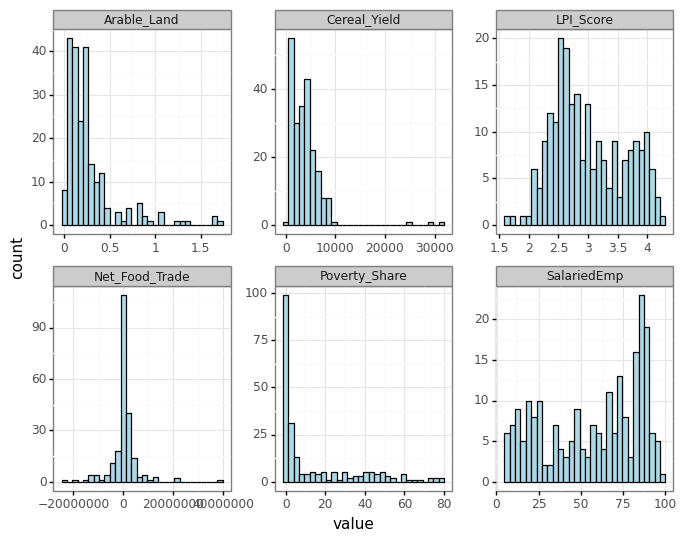

In [127]:
print(v1)

In [128]:
D = train_X[['Arable_Land', 'Cereal_Yield', 'SalariedEmp', 'LPI_Score', 'Poverty_Share', 'Net_Food_Trade']]
D['GFSI_Index'] = train_y

In [129]:
#Logging some variables
D['ln_ArableLand'] =  np.log(D['Arable_Land'] + 1)
D['ln_CerealYield'] =  np.log(D['Cereal_Yield'] + 1)
D['ln_Poverty'] =  np.log(D['Poverty_Share'] + 1)


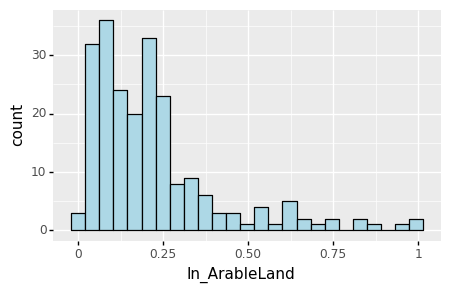

<ggplot: (148168286425)>

In [130]:
#Checking log effect on Arable Land
(
    ggplot(D,aes(x="ln_ArableLand")) +
    geom_histogram(bins=25, color="black", fill="lightblue") +
    theme(figure_size=(5,3),
          subplots_adjust={'wspace':0.25})
)

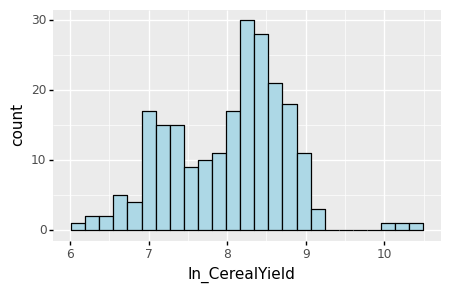

<ggplot: (148168265021)>

In [131]:
#Checking log effect on Cereal Yield
(
    ggplot(D,aes(x="ln_CerealYield")) +
    geom_histogram(bins=25, color="black", fill="lightblue") +
    theme(figure_size=(5,3),
          subplots_adjust={'wspace':0.25})
)

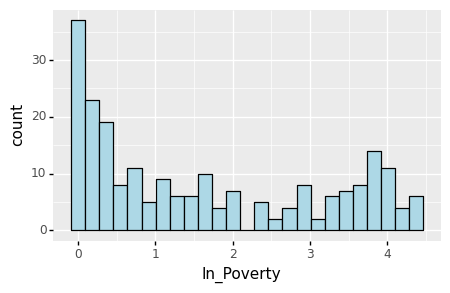

<ggplot: (148168128970)>

In [132]:
#Checking log effect on Poverty 
(
    ggplot(D,aes(x="ln_Poverty")) +
    geom_histogram(bins=25, color="black", fill="lightblue") +
    theme(figure_size=(5,3),
          subplots_adjust={'wspace':0.25})
)

In [133]:
#Convert the Index to numeric type to be able to plot it. 
D["GFSI_Index"] = pd.to_numeric(D["GFSI_Index"])

In [134]:
#Drop the previous Arable Land, Cereal Yield, and Poverty Share from D 
D = D.drop(['Arable_Land', 'Cereal_Yield', 'Poverty_Share'], axis=1)

In [135]:
v3 = (
    ggplot(D.melt(id_vars=["GFSI_Index"]),
           aes(x="value",y="GFSI_Index"))+
    geom_point(alpha=.5, color="red", size=0.5) +
    facet_wrap("variable",scales="free") +
    theme_bw() +
    theme(figure_size = (12,10), subplots_adjust={'wspace':0.25, 'hspace':0.25}) +
    scale_y_continuous(limits=[30, 86])
    
)

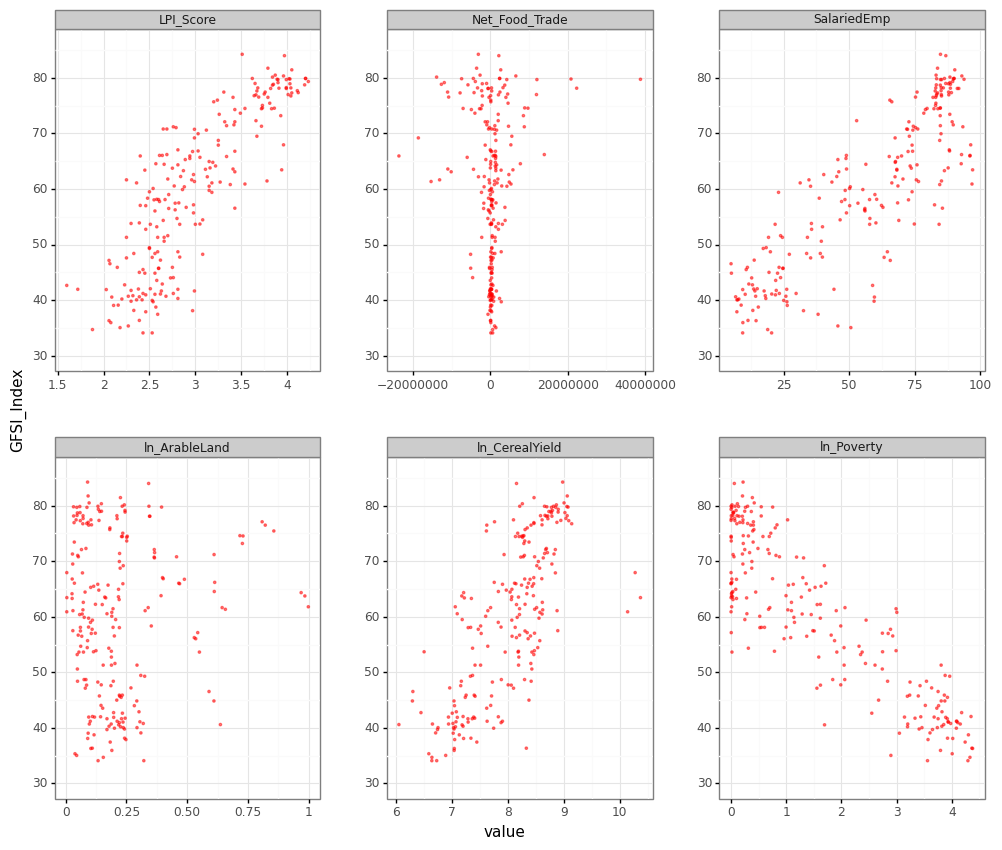

In [136]:
print(v3)

In [137]:
#Make these changes on the original dataframe and then split again 
y = df_complete[['GFSI_Index']]
y1 = df_complete[['GFSI_Index', 'Country']]
X = df_complete.drop(columns=['GFSI_Index', 'Country'])



In [138]:
#Logging the variables
X['ln_ArableLand'] =  np.log(X['Arable_Land'] + 1)
X['ln_CerealYield'] =  np.log(X['Cereal_Yield'] + 1)
X['ln_Poverty'] =  np.log(X['Poverty_Share'] + 1)

In [139]:
#Drop the previous Arable Land, Cereal Yield, and Poverty Share 
X = X.drop(['Arable_Land', 'Cereal_Yield', 'Poverty_Share'], axis=1)

### Re-splitting the data and Modelling Pipeline

In [198]:
#Now we are going to re-split the data into traning and testing since the changes have been made
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = .25,random_state=123)

In [199]:
# Set the folds index to ensure comparable samples
fold_generator = KFold(n_splits=10, shuffle=True,random_state=1234)

In [200]:
#Initialize pipeline
pipe = Pipeline(steps=[('pre_process', pp.MinMaxScaler()),('model',None)])

In [201]:
#Specify the models 
search_space = [
        
   # Linear Model
    {'model' : [LM()]},
    
   #Support Vector Regression
    {'model': [SVR(kernel ='rbf')]},
    
    #Decision Tree Regressor
    {'model' :[DR(random_state=42)]},
    
    #Random Forest Regressor 
    {'model' :[RR(random_state=42)]}
]

In [202]:
#Putting it all together in the grid search 
search = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='neg_mean_squared_error',
                      n_jobs=4)

In [203]:
#Fit the model to the training data
search.fit(train_X,train_y)

GridSearchCV(cv=KFold(n_splits=10, random_state=1234, shuffle=True),
             estimator=Pipeline(steps=[('pre_process', MinMaxScaler()),
                                       ('model', None)]),
             n_jobs=4,
             param_grid=[{'model': [LinearRegression()]}, {'model': [SVR()]},
                         {'model': [DecisionTreeRegressor(random_state=42)]},
                         {'model': [RandomForestRegressor(random_state=42)]}],
             scoring='neg_mean_squared_error')

In [204]:
#Check the best score
search.best_score_

-16.821935035573123

In [205]:
#Check the best model
search.best_params_

{'model': RandomForestRegressor(random_state=42)}

### Test Performance

In [206]:
# Predict() method will use the best model out of the scan
pred_y = search.predict(test_X)

In [207]:
#Check the mean squared error
m.mean_squared_error(test_y,pred_y)

15.334517316666759

In [208]:
#The best estimator
mod = search.best_estimator_
print(mod)

Pipeline(steps=[('pre_process', MinMaxScaler()),
                ('model', RandomForestRegressor(random_state=42))])


In [209]:
m.r2_score(test_y,pred_y)

0.9140338840740502

## Model Interpretation

### Permutation Importance

In [210]:
#Permutation Importance
vi = permutation_importance(mod,train_X,train_y,n_repeats=25)

In [211]:
# Organize as a data frame 
vi_dat = pd.DataFrame(dict(variable=train_X.columns,
                           vi = vi['importances_mean'],
                           std = vi['importances_std']))

# Generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

# But in order from most to least important
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)


vi_dat

,variable,vi,std,low,high
0,ln_Poverty,0.874,0.074,0.725,1.023
1,LPI_Score,0.251,0.017,0.218,0.284
2,SalariedEmp,0.061,0.004,0.053,0.070
3,ln_ArableLand,0.029,0.002,0.024,0.033
4,ln_CerealYield,0.023,0.002,0.019,0.027
5,Net_Food_Trade,0.009,0.001,0.007,0.010
6,2018,0.002,0.000,0.002,0.003
7,CCPI,0.002,0.000,0.001,0.002
8,2016,0.001,0.000,0.000,0.001


### Partial Dependency Plots

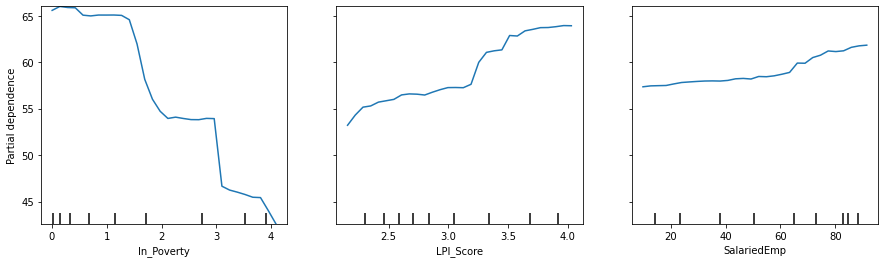

In [212]:
# Target specific features
features = ['ln_Poverty','LPI_Score','SalariedEmp']

# Calculate the partial dependency
fig, ax = plt.subplots(figsize=(15, 4))
display = plot_partial_dependence(
    mod, train_X, features,n_cols=5,
    n_jobs=4, grid_resolution=30,ax=ax
)

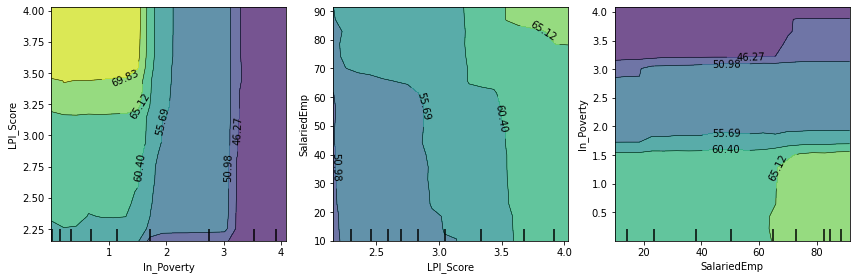

In [213]:
# Feed in the ineraction as a nested list
interacted_features = [['ln_Poverty','LPI_Score'],['LPI_Score','SalariedEmp'],['SalariedEmp','ln_Poverty']] 

# To view the interactions between the required variables
fig, ax = plt.subplots(figsize=(12, 4))
display = plot_partial_dependence(
    mod, train_X, interacted_features,
    n_cols=3,n_jobs=4, grid_resolution=20,ax=ax
)
fig.tight_layout()